# China Water Quality & Knowledge Thesis

Examining the link between water quality (2017, per prefecture) and a national general social survey (China General Social Survey, 2010) with an environmental module.

How do peoples perception of water quality (importance, status, severity, their knowledge, etc) align with actual water quality?

---

## Load Data

In [216]:
import pandas as pd
from pandas import DataFrame
import matplotlib as mpl
import seaborn as sns 
import matplotlib.pyplot as plt

In [217]:
# Returns ALL columns when displaying DataFrame, useful for finding column names
pd.set_option('display.max_columns', None)

### 1. China General Social Survey (2010)

The first dataset is the China General Social Survey (CGSS), an annual national comprehensive survey consisting of demographic data, social indicators, and rotating modules. The year 2010 is used since it is the latest published which includes the environmental module, 20+ questions about quality of the environment, peoples' thoughts on the importance of the environment, the severity of environmental degredation, etc. (more details below).

http://cgss.ruc.edu.cn/index.php?r=index/index&hl=en

In [218]:
# Load cgss2010 Stata file, display the first 5 rows (.head())
cgss = pd.read_stata('../data/cgss2010_12.dta', convert_categoricals=False)
cgss.head()

,id,s41,s42,s43,s44,s45,s5,a1202,a1402,a1502,a1602,a1203,a1403,a1503,a1603,a1204,a1404,a1504,a1604,a1205,a1405,a1505,a1605,a1206,a1406,a1506,a1606,a1207,a1407,a1507,a1607,a1208,a1408,a1508,a1608,a1209,a1409,a1509,a1609,a1210,a1410,a1510,a1610,a1211,a1411,a1511,a1611,a1212,a1412,a1512,a1612,a1213,a1413,a1513,a1613,a1214,a1414,a1514,a1614,a1215,a1415,a1515,a1615,a13201,a13202,a13203,a13204,a13205,a13206,a13207,a13208,a13209,a13210,a13211,a13212,a13213,a13214,a13301,a13302,a13303,a13304,a13305,a13306,a13307,a13308,a13309,a13310,a13311,a13312,a13313,a13401,a13402,a13403,a13404,a13405,a13406,a13407,a13408,a13409,a13410,a13411,a13412,a13501,a13502,a13503,a13504,a13505,a13506,a13507,a13508,a13509,a13510,a13511,a13601,a13602,a13603,a13604,a13605,a13606,a13607,a13608,a13609,a13610,a13701,a13702,a13703,a13704,a13705,a13706,a13707,a13708,a13709,a13801,a13802,a13803,a13804,a13805,a13806,a13807,a13808,a13901,a13902,a13903,a13904,a13905,a13906,a13907,a131001,a131002,a131003,a131004,a131005,a131006,a131101,a131102,a131103,a131104,a131105,a131201,a131202,a131203,a131204,a131301,a131302,a131303,a131401,a131402,a131501,a2,a3a,a3b,a3c,a4,a5,a6,a7a,a7b,a7c,a8a,a8b,a9,a9a,a10,a10a,a11,a121,a122,a123,a124,a125,a126,a127,a128,a13,a14,a15,a16,a17,a18,a19,a20,a21,a23,a24,a25,a281,a282,a283,a284,a285,a286,a29,a3001,a3002,a3003,a3004,a3005,a3006,a3007,a3008,a3009,a3010,a3011,a3012,a311,a312,a313,a32,a33,a34,a35,a36,a371,a372,a373,a38,a39,a40,a41,a421,a422,a423,a424,a425,a43a,a43b,a43c,a43d,a44,a45,a46,a47,a48,a49,a50,a51,a52,a53,a53a,a54,a55,a561,a562,a563,a564,a565,a566,a567,a57,a58,a59a,a59aa,a59b,a59ba,a59c,a59e,a59f,a59fa,a59g,a59h,a59j,a59k,a59m,a60a,a60aa,a60b,a60ba,a60c,a60e,a60f,a60fa,a60g,a60h,a60j,a60k,a60m,a611,a612,a62,a6301,a6302,a6303,a6304,a6305,a6306,a6307,a6308,a6309,a6310,a6311,a64,a65,a66,a671,a672,a673,a674,a675,a676,a677,a678,a679,a681,a682,a69,a70,a71a,a71b,a72,a73,a74,a75,a76,a76a,a77,a78,a79,a80,a81,a82,a82a,a83,a83a,a85,a87,a88,a89a,a89b,a89c,a89d,a89da,a89f,a89g,a89h,a90a,a90b,a90c,a90d,a90da,a90f,a90g,a90h,a91,a92,b111,b121,b131,b141,b151,b112,b122,b132,b142,b152,b113,b123,b133,b143,b153,b114,b124,b134,b144,b154,b21,b22,b23,b24,b3,b4,b5,b6,b7,b8,b9,b1011,b1012,b1021,b1022,b11,b12,b13,b14,b15,b16,b17,b18,b19,b20,c1,c201,c202,c203,c204,c205,c206,c207,c208,c209,c210,c211,c212,c213,c214,c215,c216,c301,c302,c303,c304,c305,c306,c307,c308,c309,c310,c4,c5,c6,c7a,c7b,c8a,c8b,c8c1,c8c2,c8c3,c8c4,c8c5,c8c6,c8c7,c8c8,c911,c921,c912,c922,c913,c923,c914,c924,c915,c925,c916,c926,c101,c102,c103,c104,c105,c106,d1a,d1b,d1c,d1d,d1e,d1f,d2a,d2b,d2c,d2d,d2e,d2f,d2g,d2h,d2i,d301,d302,d303,d304,d305,d306,d307,d308,d309,d310,d311,d312,d4a,d4b,d4c,d4d,d5a,d5b,d601,d602,d603,d604,d605,d606,d607,d608,d609,d610,d71,d72,d73,d74,d8,d91,d92,d93,d94,d95,d96,d1001,d1002,d1003,d1004,d1005,d1006,d1007,d1008,d1009,d1010,d1011,d111,d112,d12a,d12aa,d12b,d12c,d12d1,d12d2,d12d3,d12d4,d12d5,d12d6,d12d7,d12d8,d13a,d13b01,d13b02,d13b03,d13b04,d13b05,d13b06,d13b07,d13b08,d13b09,d13b10,d13b11,d13b12,d13b13,d14,d15,d16,d17,d181,d182,d183,d184,d185,d186,d187,d19a,d19b,d19c,d19d,d19e1,d19e2,d19e3,d19e4,d19e5,d19e6,d19e7,d201,d202,d203,d204,d205,d206,d207,d211,d212,d213,d214,d215,d216,d217,d218,d221,d222,d223,d224,d225,d226,d227,l1a,l1b,l2a,l2b,l3a,l3b,l5a,l5b,l6a,l6b,l7a,l7b,l7c,l8a,l8b,l9a,l9b,l9c,l10a,l10b,l10c,l11a,l11b,l11c,l12a,l12b,l12c,l131,l132,l133,l134,l135,l136,l137,l14a,l14b,l14c,l14d,l14e,l14f,l14g,l15a,l15b,l16a,l16b,l16c,l17a,l17b,l18,l19a1,l19a2,l19a3,l19b,l20a,l20b,l20c,l20d,l20e,l20f,l21,l22a,l22b,l22c,l23a,l23b,l2401,l2402,l2403,l2404,l2405,l2406,l2407,l2408,l2409,l2410,l2501,l2502,l2503,l2504,l2505,l2506,l2507,l2508,l2509,l2510,l2511,l2512,l2513,l2514,l2515,msfq2,msfq3,msfq4,msfq6,msfq7,msfq8,msfq9,msfq10,msfq12,ma13,ma14,ma15,ma161,ma162,ma163,ma164,ma165,ma166,mb1,mb2,mb3,mb4,mb5,mc1,mc2a,mc2b,mc3,mc401,mc402,mc403,mc404,mc405,mc406,mc407,mc408,mc409,mc410,md1,me1a,me1b,me1c,mf1a,mf1b,mf1c,mf2a,mf2b,mf2c,mf3a,mf3b,mf3c,mf6,mg1a,mg1b,mg1c,mg21,mg22,mg23

#### Important Survey Questions' Information below

###### Important Survey Questions

### General Demographics
s41 - province codes

a2 - gender

a3a - birth year

a3b - birth month

a3c - birth date

a7a - highest current level of education

a8a - personal total income

a15 - subjective physical health

a62 - family total income (2009)

a91 - rural / agricultural household *(1=yes, 2=no)*

a92 - rural / agricultural household *(1=yes, 2=no) (verified by surveyor)*


### Environmental Module (Part L)
l1a - "In your opinion, in terms of the current situation in our country, which of the following issues is the most important?" **(4 = environment)**

l1b - *like l1a, but 2nd most important*

l6a - "In your opinion, in terms of the current situation in our country, which of the following issues is the most important?" *(1 = not at all, 5 = very concerned)*

l6b - How serious are env. problems facing China? *(1 = very, 5 = not at all)*

l7a - Which is most important env. issue in China? **(4 = water pollution)**

l7b - Which has greatest impact on you/family? **(4 = water pollution)**

l8a - Knowledge of causes of environmental problems from ?l7

l8b - Knowledge of solutions of environmental problems from ?l7

l12a - "In order to protect the environment, to what extent are you willing to pay a higher price?" *(1 = very willing, 5 = very reluctant)*

l12b - *like l12a, but with higher taxes*

l12c - like l12a/b, but with willingness to lower living standards

l137 - "Environmental issues directly affect my daily life" *(1 = disagree, 5 = agree)*

l14d - "How do you think the pollution of rivers, rivers and lakes in China is harmful to the environment?" *(1 = extremely, 5 = not at all)*

l15a/b - *see question, about statements of responsibility for environmental protection (individuals/companies, government, etc.)*

l16c - "In terms of solving environmental problems in your area, how do you think the local government has done in the past five years?" *(1 = ignored, 5 = successful)*

l20e - "Do you often save water or reuse water specifically for environmental protection?" *(1 = always, 4 = never)*

l2409 - "In the domestic water pollution report, the water quality of Category V (5) is better than that of Category I (1)" *(1 = correct, 2 = incorrect, 8 = cannot choose)*


In [219]:
important_questions = ['s41','a2','a3a','a3b','a3c','a7a','a8a','a15','a62','a91','a92','l1a','l1b','l6a','l7a','l7b','l8a','l8b','l12a','l12b','l12c','l137','l14d','l15a','l15b','l16c','l20e','l2409']

For some reason, I need to manually copy the list of important column codes. They are the same as the `important questions` above.

In [220]:
cgss_important = cgss[['s41','a2','a3a','a3b','a3c','a7a','a8a','a15','a62','a91','a92','l1a','l1b','l6a','l7a','l7b','l8a','l8b','l12a','l12b','l12c','l137','l14d','l15a','l15b','l16c','l20e','l2409']]
cgss_important.describe()

,s41,a2,a3a,a3b,a3c,a7a,a8a,a15,a62,a91,a92,l1a,l1b,l6a,l7a,l7b,l8a,l8b,l12a,l12b,l12c,l137,l14d,l15a,l15b,l16c,l20e,l2409
count,11783.000000,11783.000000,11783.000000,11783.000000,11783.000000,11783.000000,11783.000,11783.000000,11783.00,11782.000000,6694.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,15.366205,1.518204,1962.196809,6.590512,14.806331,4.840703,1395715.625,3.606891,1266528.50,1.565948,1.898267,9.581155,10.884532,3.720316,14.029956,13.319989,2.920752,2.583333,3.280229,3.543028,3.572440,3.820534,2.913943,3.227669,3.192810,3.463780,2.482026,6.352397
std,8.865554,0.499690,35.062692,3.472828,8.585052,2.998698,3442447.500,1.139152,3271839.25,0.504143,0.396405,23.114167,25.581364,1.133402,29.785397,28.256381,1.539628,1.583291,1.863691,1.877130,1.766908,1.606539,1.994326,2.708164,2.632461,2.159607,1.031619,2.881289
min,1.000000,1.000000,-3.000000,-3.000000,-3.000000,-3.000000,0.000,-3.000000,0.00,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,7.000000,1.000000,1952.000000,3.000000,8.000000,3.000000,4000.000,3.000000,15000.00,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,15.000000,2.000000,1964.000000,7.000000,15.000000,4.000000,12000.000,4.000000,30000.00,2.000000,2.000000,2.000000,2.000000,4.000000,4.000000,4.000000,3.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,3.000000,3.000000,8.000000
75%,22.000000,2.000000,1974.000000,10.000000,22.000000,6.000000,30000.000,4.000000,61104.00,2.000000,2.000000,6.000000,6.000000,4.000000,6.000000,6.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,2.000000,2.000000,4.000000,3.000000,8.000000
max,31.000000,2.000000,1993.000000,12.000000,31.000000,14.000000,9999999.000,5.000000,9999999.00,2.000000,2.000000,98.000000,98.000000,8.000000,98.000000,98.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,4.000000,8.000000


#### Very Limited Subset of Questions (for initial analysis)

This only includes the most important questions,

In [221]:
columns_strict = ['s41','l14d','l2409']

In [222]:
cgss_strict = cgss[columns_strict]

Only include the strict set of 3 columns

The survey uses geographic identifiers in columns s41 (and I think s42-44). However, only province level information is released, due to privacy concerns (see [this link](http://cgss.ruc.edu.cn/index.php?r=index/artabout&aid=18)). They are listed below, in a dictionary (Chinese)

In [223]:
s41_codes = {
    1: '上海市',
    2: '云南省',
    3: '内蒙古自治区',
    4: '北京市',
    5: '吉林省',
    6: '四川省',
    7: '天津市',
    8: '宁夏回族自治区',
    9: '安徽省',
    10: '山东省',
    11: '山西省',
    12: '广东省',
    13: '广西壮族自治区',
    14: '新疆维吾尔自治区',
    15: '江苏省',
    16: '江西省',
    17: '河北省',
    18: '河南省',
    19: '浙江省',
    20: '海南省',
    21: '湖北省',
    22: '湖南省',
    23: '甘肃省',
    24: '福建省',
    25: '西藏自治区',
    26: '贵州省',
    27: '辽宁省',
    28: '重庆市',
    29: '陕西省',
    30: '青海省',
    31: '黑龙江省'}

In [224]:
s41_codes_short = {
    1: '上海',
    2: '云南',
    3: '内蒙古',
    4: '北京',
    5: '吉林',
    6: '四川',
    7: '天津',
    8: '宁夏',
    9: '安徽',
    10: '山东',
    11: '山西',
    12: '广东',
    13: '广西',
    14: '新疆',
    15: '江苏',
    16: '江西',
    17: '河北',
    18: '河南',
    19: '浙江',
    20: '海南',
    21: '湖北',
    22: '湖南',
    23: '甘肃',
    24: '福建',
    25: '西藏',
    26: '贵州',
    27: '辽宁',
    28: '重庆',
    29: '陕西',
    30: '青海',
    31: '黑龙江'}

In [225]:
provinces = pd.read_csv('prov.csv')
provinces.set_index('s41')

,province_full,province,province_en
s41,,,
1,上海市,上海,Shanghai
2,云南省,云南,Yunnan
3,内蒙古自治区,内蒙古,Inner Mongolia
4,北京市,北京,Beijing
5,吉林省,吉林,Jilin
6,四川省,四川,Sichuan
7,天津市,天津,Tianjin
8,宁夏回族自治区,宁夏,Ningxia
9,安徽省,安徽,Anhui


*below isn't needed since df `prov` is made above*

---

The list is then put into a df, called `s41`. *Note: The `orient` field refers to the data being horizontal or vertical, and the `columns` field adds column names. The `.index.name` adds a title to the index column.*

Add the s41 codes, full province names, and shortened ones into one dataframe `s41`

---

### 2. 2018 Blue City Water Quality Index Ranking

The second dataset is the water quality of every prefecture (sub-province) from a 2018 publication (using 2017 measurements). **Add more details**

https://wwwoa.ipe.org.cn//Upload/201909201147459274.pdf (en)

In [226]:
wqir = pd.read_csv('../data/wqir2018_zh.csv', sep=' ')

In [227]:
province = wqir['province']
score = wqir['score']
city = wqir['city']
category = wqir['level']

---

## Data Exploration

### CGSS2010

#### Heatmap Function

The following function asks the user to imput a column title (question code). Any column name can be entered, but for interesting results, choose one from the above list of important survey questions.

Once the column name is entered, the function displays a visual heatmap of the response types by decimal (total = 1.0) on the x axis, sorted by province on the y axis.

Enter `heatmap()` to execute this function.

In [228]:
def heatmap():
        user_column = input('Enter a column code: ')
        user = cgss[df_cgss[user_column] >= 1]
        # Group by provence, count people in each province, then sort them by asceding order.
        user_grouped = (user.groupby(['s41', user_column])
            .size()
            .unstack(fill_value=0)
            .sort_index(axis=1, ascending=True)
            )
        user_grouped_percent=user_grouped.div(user.groupby(['s41']).size(), axis=0)
        user_grouped_percent=user_grouped_percent.round(1)
        fig, ax = plt.subplots()
        sns.set_theme(
            style="white",
            font='dengxian',
            font_scale=.30,
            )
        sns.heatmap(
            user_grouped_percent,
            vmin=0,
            vmax=1,
            yticklabels=1,
            annot=True,
            cmap='viridis',
            square=True,
            cbar=False,
            )
        ax.set_title(user_column)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        plt.setp(ax.get_yticklabels(), rotation=0, ha="center", rotation_mode="anchor")
        fig.tight_layout()

#### Count Function

The following function does the same initial steps as the `heatmap` function, but without normalizing by the number of responses per province (it only sums the responses by type and by province).

Enter `count()` to execute this function.

In [229]:
def count():
    user_column = input('Enter a column code: ')
    user = cgss[cgss[user_column] >= 1]
    user_grouped = (user.groupby(['s41', user_column])
        .size()
        .unstack(fill_value=0)
        .sort_index(axis=1, ascending=True)
        )
    print(user_grouped)

#### Percent Function

The following function is the same as the `count` function, but also normalizes per province to make quanities comparable. It's essentially the `heatmap` function without the visualization.

Enter `percent()` to execute this function.

In [230]:
def percent():
    user_column = input('Enter a column code: ')
    user = cgss[cgss[user_column] >= 1]
    user_grouped = (user.groupby(['s41', user_column])
        .size()
        .unstack(fill_value=0)
        .sort_index(axis=1, ascending=True)
        )
    user_grouped_percent=user_grouped.div(user.groupby(['s41']).size(), axis=0)
    user_grouped_percent=user_grouped_percent
    user_grouped_percent=user_grouped_percent
    print(user_grouped_percent)

#### Individual Question Countplot

The following function visualizes number of responses (total, not per province) for each response type of an entered column (question code).

Enter `countplot()` to execute this function.

In [231]:
def countplot():
    user_column = input('Enter a column code: ')
    sns.countplot(
        data=cgss,
        x=cgss[user_column],
        )

---

### 2018 Blue City Water Quality Index Ranking Visualization (WQIR2018)

The following shows statististical information for the WQIR2018 dataset. Let's see the data, loaded above. As evident, the `Province`, `City`, `Score`, `Rank`, and the `Level` for the water quality level.

In [232]:
wqir.head()

,rank,province,city,score,level
0,1,青海,海南州,4.04,优
1,2,四川,甘孜,4.11,优
2,3,四川,阿坝,4.42,优
3,4,青海,海北,4.58,优
4,5,青海,果洛,4.73,优


On page 5 of the report [here](https://wwwoa.ipe.org.cn//Upload/201909201147459274.pdf) (mentioned above), the following are the score/level to water quality classes (outlined [here](http://english.mee.gov.cn/SOE/soechina1997/water/standard.htm)):

| IPE Score     | IPE Level (EN)          | IPE Level (ZH) | EQ  Water |
|:-------------:|:-----------------------:|:--------------:|:---------:|
| 0.00 - 4.79   | Excellent               | 优             | II     |
| 4.79 - 10.28  | Good                    | 良             |III    |
| 10.28 - 16.85 | Moderate                | 一般           | IV     |
| 16.85 - 24.74 | Relatively Poor         | 较差           | V       |
| 24.70 - 50.00 | Poor                    | 差             | V      |

*Note: The EQ equivalents above refer "The total score (equivalent to the local water
quality average) met or surpassed the requirements of Class `X` (II-V) water quality..."*

In [233]:
wqir_mean = wqir.groupby(by='province').agg('mean')

The following plot visualizes the WQIR2018 values by province (y axis), with each prefecture's score lined up on the x axis. This is to visualize the range of water quality values in each province. On the top and right, two histograms count the occurances at each value (horizontal, top one bins water quality scores, while the vertical, right one bins the number of prefecture regions per province).

/home/will/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38738 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/will/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28023 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/will/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/will/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/will/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/will/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: Runtim

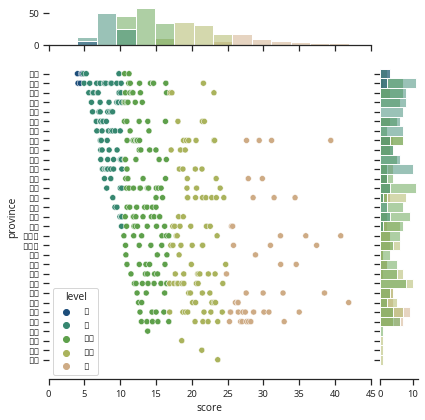

In [234]:
sns.set_theme(
    style="ticks",
    font='Noto Sans',
    font_scale=.85,
    )

g = sns.JointGrid(
    ratio=7,
    space=.25,
    marginal_ticks=True,
    xlim=(0,45),
    x=score,
    y=province,
    palette="gist_earth",
    hue=category,
    data=wqir,
) 
  
sns.despine(trim=False, left=True, bottom=False)
g.plot(sns.scatterplot, sns.histplot)

---

## Combining Data

In this section, I will try to link the data from CGSS2010 and WQIR2018 and compare them across provinces.

## Sorting Data

This section has the data loaded previously sorted, usually by province.

First, count the values of the `cgss_strict` df (so it's easier to deal with and understand) by province `s41`. I learned this [here](https://kanoki.org/2020/03/09/how-to-use-pandas-count-and-value_counts/).

In [235]:
cgss_strict.groupby(by='s41').agg('count')

,l14d,l2409
s41,,
1.0,183,183
2.0,103,103
3.0,28,28
4.0,173,173
5.0,164,164
6.0,179,179
7.0,120,120
8.0,27,27
9.0,126,126


### `l14d`

Sort by response types for `l14d`, see the number of responses. Column `s41` is irrelavent, this is just to see all response types for `l14d`.

In [236]:
cgss_strict.groupby(by='l14d').agg('count')

,s41,l2409
l14d,,
-3.0,6,6
-2.0,11,11
1.0,565,565
2.0,1429,1429
3.0,972,972
4.0,250,250
5.0,37,37
8.0,402,402


As we can see, there are negative values, which are not valid response types. Let's see which provinces they're in, to see if we can safely drop the values.

In [237]:
cgss_strict[cgss_strict['l14d'] < 0].groupby(by='s41').agg('count')

,l14d,l2409
s41,,
1.0,2,2
2.0,3,3
6.0,1,1
7.0,1,1
10.0,1,1
17.0,1,1
19.0,1,1
21.0,2,2
22.0,1,1


### `l2409`

repeat

In [238]:
cgss_strict.groupby(by='l2409').agg('count')

,s41,l14d
l2409,,
-3.0,25,25
-2.0,19,19
1.0,287,287
2.0,596,596
8.0,2745,2745


In [239]:
cgss_strict[cgss_strict['l2409'] < 0].groupby(by='s41').agg('count')

,l14d,l2409
s41,,
1.0,2,2
2.0,3,3
6.0,2,2
7.0,5,5
10.0,1,1
12.0,1,1
15.0,2,2
16.0,1,1
19.0,1,1


---

For the first question `l14d`, the negative values are fairly spread out between columns. It's safe to drop them.


However, for `l2409`, they make up a large proportion of the total response values for province 25, which is Tibet. As seen below, filtered just for Tibet for question l2409, 17/19 responses are invalid. Because water quality for Tibet also isn't included, we're forced to remove it from this analysis.

In [240]:
cgss_strict[cgss_strict['s41']==25].groupby('l2409').agg('count')

,s41,l14d
l2409,,
-3.0,17,17
8.0,2,2


The response value of 8 refers to "cannot choose", so for now, let's drop those (it may be important later)

Let's drop the two problmatic values -3 and -2, and 8, group by province again, and calculate the mean.

## **If I filter out 8, then Ningxia province get's taken out... find a fix**

In [267]:
cgss_strict_mean = cgss_strict.replace([-3,-2,],).groupby(by='s41').agg('mean')
cgss_strict_mean

,l14d,l2409
s41,,
1.0,2.500000,5.726776
2.0,3.514851,7.108911
3.0,3.000000,3.607143
4.0,2.358382,5.936416
5.0,2.902439,6.371951
6.0,3.273743,7.061798
7.0,2.466667,6.067797
8.0,2.888889,5.518519
9.0,3.412698,7.325397


### Merge Data

The following merges the `wqir_mean` values with the `provinces` dataframe.

In [242]:
merge = pd.merge(wqir_mean, provinces, on='province')
merge

,province,rank,score,s41,province_full,province_en
0,上海,282.000000,21.400000,1,上海市,Shanghai
1,云南,109.750000,11.520625,2,云南省,Yunnan
2,内蒙古,240.416667,21.080833,3,内蒙古自治区,Inner Mongolia
3,北京,248.000000,18.600000,4,北京市,Beijing
4,吉林,233.888889,19.920000,5,吉林省,Jilin
5,四川,89.714286,10.035714,6,四川省,Sichuan
6,天津,313.000000,23.630000,7,天津市,Tianjin
7,宁夏,221.600000,17.930000,8,宁夏回族自治区,Ningxia
8,安徽,211.937500,16.977500,9,安徽省,Anhui
9,山东,272.470588,21.858824,10,山东省,Shandong


Then, the `cgss_strict_clean` values are merged in. (I didn't know how to do this in one step)

In [243]:
merged = pd.merge(merge,cgss_strict_mean,on='s41')
merged

,province,rank,score,s41,province_full,province_en,l14d,l2409
0,上海,282.000000,21.400000,1,上海市,Shanghai,1.899408,1.813953
1,云南,109.750000,11.520625,2,云南省,Yunnan,2.402299,1.470588
2,内蒙古,240.416667,21.080833,3,内蒙古自治区,Inner Mongolia,2.836364,1.454545
3,北京,248.000000,18.600000,4,北京市,Beijing,2.084337,1.746667
4,吉林,233.888889,19.920000,5,吉林省,Jilin,2.193333,1.660377
5,四川,89.714286,10.035714,6,四川省,Sichuan,2.556250,1.525000
6,天津,313.000000,23.630000,7,天津市,Tianjin,2.017699,1.854167
7,安徽,211.937500,16.977500,9,安徽省,Anhui,2.373832,1.894737
8,山东,272.470588,21.858824,10,山东省,Shandong,2.459854,1.666667
9,山西,282.090909,23.310000,11,山西省,Shanxi,2.108696,1.523810


Quick check to see if there are visible trends...

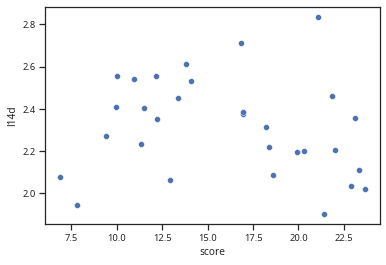

In [244]:
g = sns.scatterplot(
    x='score',
    y='l14d',
    palette="gist_earth",
    data=merged,
)

---

Now, let's do this with the larger `cgss_important` dataframe:

In [245]:
cgss_important.groupby(by='s41').agg('mean')

,a2,a3a,a3b,a3c,a7a,a8a,a15,a62,a91,a92,l1a,l1b,l6a,l7a,l7b,l8a,l8b,l12a,l12b,l12c,l137,l14d,l15a,l15b,l16c,l20e,l2409
s41,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,1.500000,1957.914449,6.458175,13.908745,6.992395,1.681863e+06,3.530418,2.539745e+06,1.980989,1.980620,11.939891,11.978142,3.781421,19.442623,16.704918,3.109290,2.606557,3.245902,3.540984,3.622951,3.945355,2.453552,3.076503,3.049180,3.469945,2.147541,5.644809
2.0,1.503896,1965.480519,6.503896,14.309091,3.348052,3.459813e+05,3.566234,2.043738e+05,1.223377,1.662791,11.184466,11.456311,3.699029,20.058252,21.941748,2.320388,2.242718,3.475728,3.563107,3.825243,3.106796,3.310680,2.932039,2.708738,4.009709,2.747573,6.834951
3.0,1.510000,1959.450000,6.120000,15.610000,3.610000,8.119401e+05,3.840000,3.456906e+04,1.180000,1.888889,3.142857,3.857143,3.928571,4.035714,4.285714,2.285714,1.785714,2.678571,2.821429,2.928571,3.750000,3.000000,2.035714,1.928571,2.642857,1.785714,3.607143
4.0,1.509615,1963.657692,6.459615,16.363462,7.559615,2.525986e+06,3.707692,2.778594e+06,1.976923,1.978346,6.849711,8.271676,3.913295,10.780347,8.572254,3.144509,2.994220,3.572254,3.722543,3.786127,3.959538,2.358382,3.520231,3.167630,3.271676,1.930636,5.936416
5.0,1.521561,1963.675565,6.310062,15.104723,4.517454,7.085531e+05,3.525667,5.788835e+05,1.457906,1.847534,6.073171,7.981707,3.500000,16.554878,11.347561,2.762195,2.500000,3.378049,3.634146,3.725610,3.865854,2.902439,3.567073,3.634146,3.707317,2.481707,6.371951
6.0,1.554077,1960.412646,6.430948,14.961730,3.931780,1.439958e+06,3.372712,8.879654e+05,1.462562,1.697842,10.245810,11.402235,3.765363,15.754190,13.826816,3.027933,2.748603,3.223464,3.558659,3.463687,3.770950,3.251397,3.430168,3.340782,3.597765,2.603352,6.944134
7.0,1.582915,1959.306533,6.432161,15.492462,6.829146,7.511211e+05,3.399497,7.776947e+05,1.989950,1.987310,4.433333,4.266667,3.925000,11.616667,12.416667,3.041667,2.641667,2.958333,3.308333,3.408333,3.900000,2.416667,2.591667,2.525000,3.391667,1.766667,5.733333
8.0,1.690000,1972.670000,6.050000,12.950000,3.650000,2.610061e+06,3.590000,5.305771e+04,1.440000,1.863636,4.111111,4.000000,3.851852,4.814815,4.259259,2.296296,1.851852,2.259259,2.518519,2.444444,2.814815,2.888889,1.592593,1.777778,3.074074,2.296296,5.518519
9.0,1.471883,1959.352078,6.630807,14.457213,3.535452,2.534328e+05,3.545232,3.417674e+05,1.217604,1.910112,6.857143,7.222222,3.428571,16.158730,17.730159,2.738095,2.420635,3.333333,3.746032,4.007937,3.968254,3.412698,2.873016,3.039683,3.904762,2.722222,7.325397
